Group Name: Sedats
 Name: Sedat CAN (one-member group)
Email: sedatcancan1@gmail.con
Country: Germany
 Specialization: Data Science, NLP, Data Analyst

Problem Description
Hate speech is one of the biggest problems that social media users face on daily basis.  Especially, Twitter users are harassed and discriminated against because of their religion, ethnicity, nationality, race, color, ancestry, sex, etc. 
The hate speech detection model would evaluate and classifies whether tweets include hate speech or not and filters these tweets to offer a better user experience. 
Business understanding


In [6]:
import numpy as np 
import pandas as pd
import nltk



In [7]:
filename = "/kaggle/input/twitter-hate-speech/train_E6oV3lV.csv" 
from nltk.stem import WordNetLemmatizer
from nltk import tokenize
nltk.download()
import re











NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  d



Download which package (l=list; x=cancel)?


  Identifier>  l


Packages:
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] comparative_sentences Comparative Sentence Dataset
  [ ] dolch............... Dolch Word List
  [ ] extended_omw........ Extended Open Multilingual WordNet
  [ ] framenet_v15........ FrameNet 1.5
  [ ] framenet_v17........ FrameNet 1.7
  [ ] mwa_ppdb............ The monolingual word aligner (Sultan et al.
                           2015) subset of the Paraphrase Database.
  [ ] nombank.1.0......... NomBank Corpus 1.0
  [ ] nonbreaking_prefixes Non-Breaking Prefixes (Moses Decoder)
  [ ] omw-1.4............. Open Multilingual Wordnet
  [ ] panlex_swadesh...... PanLex Swadesh Corpora
  [ ] pe08................ Cross-Framework and Cross-Domain Parser
                           Evaluation Shared Task
  [ ] perluniprops........ perluniprops: Index of Unicode Version 7.0.0
                           character properties in Perl
  [ ] verbnet3............ VerbNet Lexicon, Version 3.3
  [ ] wmt15_eval.....

Hit Enter to continue:  



Collections:
  [P] all-corpora......... All the corpora
  [P] all-nltk............ All packages available on nltk_data gh-pages
                           branch
  [P] all................. All packages
  [P] book................ Everything used in the NLTK Book
  [P] popular............. Popular packages
  [P] tests............... Packages for running tests
  [ ] third-party......... Third-party data packages

([*] marks installed packages; [P] marks partially installed collections)

Download which package (l=list; x=cancel)?


  Identifier>  



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  q


In [8]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


True

In [9]:
df =pd.read_csv(filename)
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['cleartweet'] = df['tweet'].apply(lambda  tweet: re.sub("(@[A-Za-z0-9]+)|(#)|(RT[\s]+)|(https?:\/\/\S+)|([^a-zA-Z0-9 -])", "", tweet))

df['cleartweet'] = df['cleartweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

print(df.head())


   id  label                                              tweet  \
0   1      0   @user when a father is dysfunctional and is s...   
1   2      0  @user @user thanks for #lyft credit i can't us...   
2   3      0                                bihday your majesty   
3   4      0  #model   i love u take with u all the time in ...   
4   5      0             factsguide: society now    #motivation   

                                          cleartweet  
0  father dysfunctional selfish drags kids dysfun...  
1  thanks lyft credit cant use cause dont offer w...  
2                                     bihday majesty  
3                        model love u take u time ur  
4                      factsguide society motivation  


Do my data have null value?

In [ ]:
print(df.info())
print ('NULLS?')
print(df.isnull().sum()

Lemmatizer with regex 

In [80]:
lemmatizer = WordNetLemmatizer() 

df['lematizer'] = [' '.join([lemmatizer.lemmatize(re.sub('[^A-Za-z]',' ',text)) for text in lis.split()]) for lis in df['cleartweet']]

print(df.head())

   id  label                                              tweet  \
0   1      0   @user when a father is dysfunctional and is s...   
1   2      0  @user @user thanks for #lyft credit i can't us...   
2   3      0                                bihday your majesty   
3   4      0  #model   i love u take with u all the time in ...   
4   5      0             factsguide: society now    #motivation   

                                          cleartweet  \
0  father dysfunctional selfish drags kids dysfun...   
1  thanks lyft credit cant use cause dont offer w...   
2                                     bihday majesty   
3                        model love u take u time ur   
4                      factsguide society motivation   

                                           lematizer  \
0  father dysfunctional selfish drag kid dysfunct...   
1  thanks lyft credit cant use cause dont offer w...   
2                                     bihday majesty   
3                        model love 

I want to frequencies of words in normal and hate tweets

In [31]:
normal_tweet = df[df.label == 0]
normal_tweet.head()
hate_tweet = df[df.label == 1]
hate_tweet.head()


,id,label,tweet,cleartweet,lematizer
13,14,1,@user #cnn calls #michigan middle school 'buil...,cnn calls michigan middle school build wall ch...,cnn calls michigan middle school build wall ch...
14,15,1,no comment! in #australia #opkillingbay #se...,comment australia opkillingbay seashepherd hel...,comment australia opkillingbay seashepherd hel...
17,18,1,retweet if you agree!,retweet agree,retweet agree
23,24,1,@user @user lumpy says i am a . prove it lumpy.,lumpy says prove lumpy,lumpy says prove lumpy
34,35,1,it's unbelievable that in the 21st century we'...,unbelievable 21st century wed need something l...,unbelievable st century wed need something l...


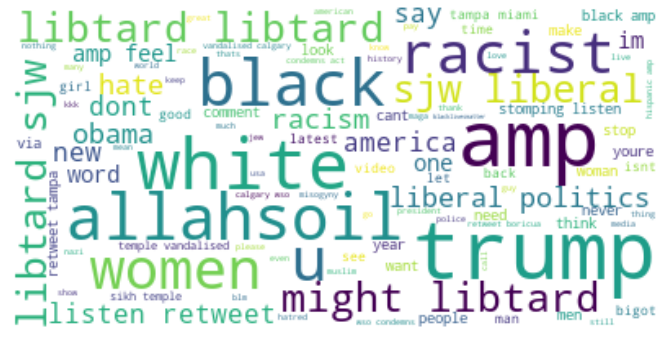

In [68]:
from os import path
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(review for review in hate_tweet['lematizer'])
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
fig = plt.figure(figsize = (20, 6)) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

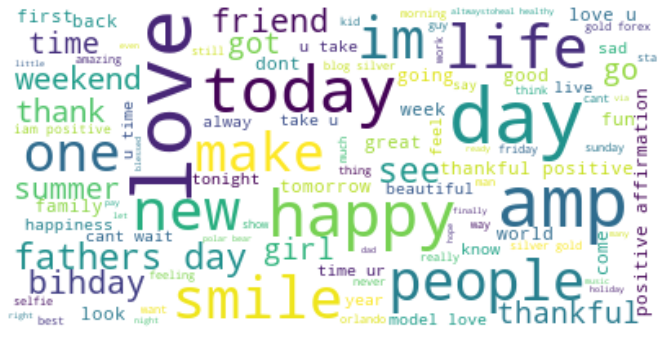

In [69]:
text = " ".join(review for review in normal_tweet['lematizer'])
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
fig = plt.figure(figsize = (20, 6)) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Featuring with stem

In [78]:
ps = nltk.stem.porter.PorterStemmer()
df['stem'] = [' '.join([ps.stem(text) for text in lis.split()]) for lis in df['cleartweet']]



print(df.iloc[10]['tweet'])
print(df.iloc[10]['cleartweet'])
print(df.iloc[10]['lematizer'])
print(df.iloc[10]['stem'])

 â #ireland consumer price index (mom) climbed from previous 0.2% to 0.5% in may   #blog #silver #gold #forex
ireland consumer price index mom climbed previous 02 05 may blog silver gold forex
ireland consumer price index mom climbed previous 02 05 may blog silver gold forex
ireland consum price index mom climb previou 02 05 may blog silver gold forex
